# Task 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data.
#### 2. Make a subset of the data set.
#### 3. Create a line chart of your data.
#### 4. Decompose the data’s components.
#### 5. Conduct a Dickey-Fuller test to check for stationarity.
#### 6. If the data isn’t stationary, conduct a round of differencing on it and repeat step 5.
#### 7. Check the data’s autocorrelations.

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\Achievement 6\02-2024 Brazilian E-Commerce'

In [4]:
# This option ensures that the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [7]:
# Import Data

df_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_avg_items_flag.csv'), index_col = False)

In [8]:
df_all.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer,avg_items_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0,2,1.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0,1,1.0
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0,1,1.0
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0,1,1.0
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0,1,1.0


In [11]:
df_all.shape

(101992, 31)

##### Changing columns to datetime type

In [12]:
# Convert string columns to datetime type
df_all['purchase_date'] = pd.to_datetime(df_all['purchase_date'])
df_all['delivered_customer_date'] = pd.to_datetime(df_all['delivered_customer_date'])
df_all['estimated_delivery_date'] = pd.to_datetime(df_all['estimated_delivery_date'])

# Extract date part
df_all['purchase_date'] = df_all['purchase_date'].dt.date
df_all['delivered_customer_date'] = df_all['delivered_customer_date'].dt.date
df_all['estimated_delivery_date'] = df_all['estimated_delivery_date'].dt.date

In [13]:
df_all.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer,avg_items_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-10,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0,2,1.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15,2017-08-18,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0,1,1.0
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23,2017-11-07,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0,1,1.0
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06,2017-08-14,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0,1,1.0
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11,2017-09-23,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0,1,1.0


In [14]:
# Export data set with the exclued time (hours) from the data set

df_all.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_hours_out.csv'), index = False)

### 2. Make a subset of the data set

##### I will investigate how the review scores from customers have changed over time.
##### Since the dataset spans a period of 3 years, I do not need to subset it further, except for selecting only the necessary columns.
##### What but I do need is to get rid of information about days, so I can smooth my data using the moving average in the next step.

In [15]:
# The variables that will be used for the forecast analysis are the date a order was delivered x reviews score.

df_sub = df_all[['delivered_customer_date', 'review_score']]

In [16]:
# Convert 'delivered_customer_date' to datetime type again
df_sub['delivered_customer_date'] = pd.to_datetime(df_sub['delivered_customer_date'])

# Extract year and month and create a new column
df_sub['year_month'] = df_sub['delivered_customer_date'].dt.to_period('M')

# Drop the original 'delivered_customer_date' 
df_sub.drop(columns=['delivered_customer_date'], inplace=True)

In [17]:
df_sub.head()

,review_score,year_month
0,4,2017-10
1,4,2017-08
2,3,2017-11
3,5,2017-08
4,5,2017-09


In [18]:
df_sub.shape

(101992, 2)

##### Having a dataset with so many observations (a individual review score) for each order is not usefull.
##### I'll group the average mean by year-month.

In [19]:
# Group by 'year_month' and calculate the mean review score for each month

monthly_avg_score = df_sub.groupby('year_month', as_index=False)['review_score'].mean()

In [20]:
monthly_avg_score.head()

,year_month,review_score
0,2016-10,3.928571
1,2016-11,3.549296
2,2016-12,3.666667
3,2017-01,4.170347
4,2017-02,4.288889


In [21]:
monthly_avg_score.shape

(25, 2)

In [22]:
# create a new dataframe with avg. review score by month

# Set 'year_month' column as the index and drop the existing index

df_monthly_avg_score = monthly_avg_score.set_index('year_month', drop=True)

# Print the DataFrame after setting 'year_month' as the index
print(df_monthly_avg_score.head())


            review_score
year_month              
2016-10         3.928571
2016-11         3.549296
2016-12         3.666667
2017-01         4.170347
2017-02         4.288889


In [23]:
df_monthly_avg_score.head()

,review_score
year_month,
2016-10,3.928571
2016-11,3.549296
2016-12,3.666667
2017-01,4.170347
2017-02,4.288889


##### Reset the “year_month”(Date) column as my index in the new dataframe

### 3. Create a line chart of the data.

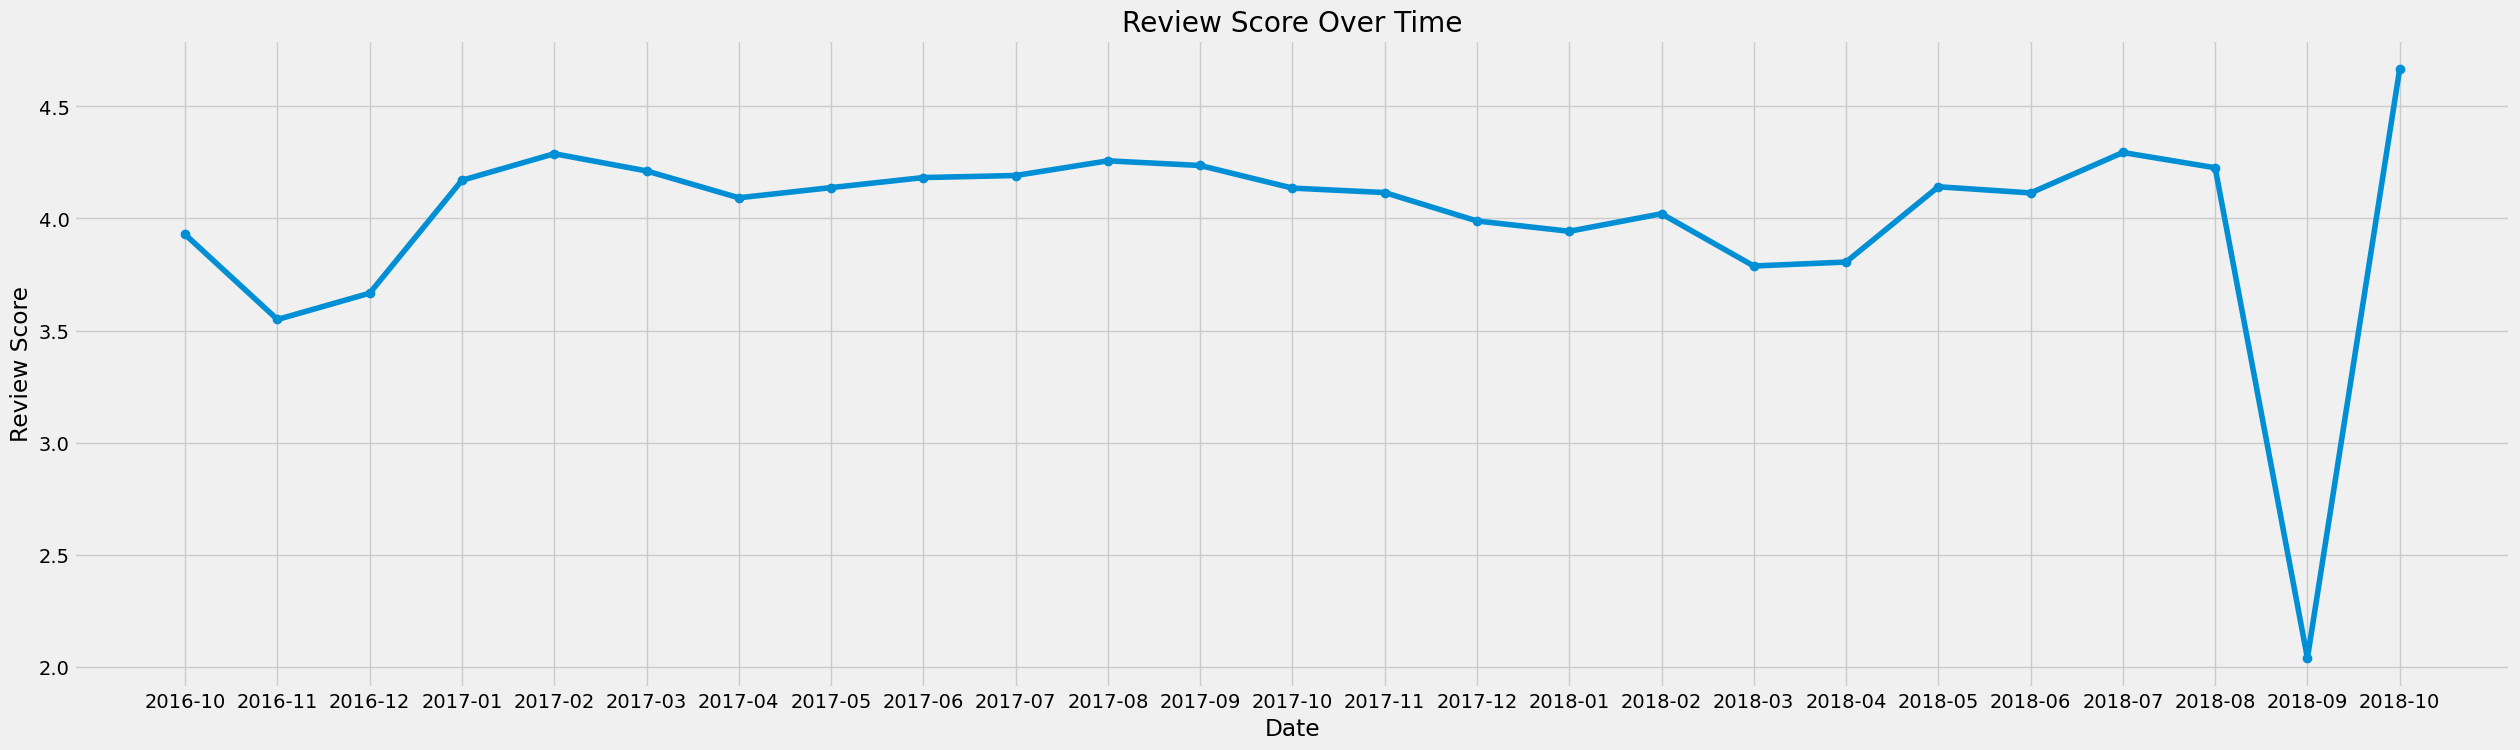

In [24]:
# Convert the index to string before plotting
df_monthly_avg_score.index = df_monthly_avg_score.index.astype(str)

# Plotting the line chart
plt.figure(figsize=(28, 8), dpi=100)
plt.plot(df_monthly_avg_score.index, df_monthly_avg_score['review_score'], marker='o', linestyle='-')
plt.title('Review Score Over Time')
plt.xlabel('Date')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()


##### I have considered smoothing my data using the moving average method so that the data will be better displayed and the results can be better interpreted. Instead of having the average review score monthly, I will aggregate the results every 3 months.

##### However,  I will continue with the monthly time series analysis.

In [25]:
# Convert 'year_month' to Timestamp
monthly_avg_score['year_month'] = monthly_avg_score['year_month'].dt.to_timestamp()

# Set 'year_month' as the index
monthly_avg_score.set_index('year_month', inplace=True)


In [26]:
# Resample the data to quarterly frequency and calculate the mean
quarterly_avg_score = monthly_avg_score.resample('Q').mean()

# Reset the index
quarterly_avg_score.reset_index(inplace=True)

# Print the new DF
print(quarterly_avg_score.head())

  year_month  review_score
0 2016-12-31      3.714845
1 2017-03-31      4.223790
2 2017-06-30      4.137455
3 2017-09-30      4.228352
4 2017-12-31      4.079981


In [27]:
# reset index before plotting again

quarterly_avg_score.set_index('year_month', drop=True, inplace = True)

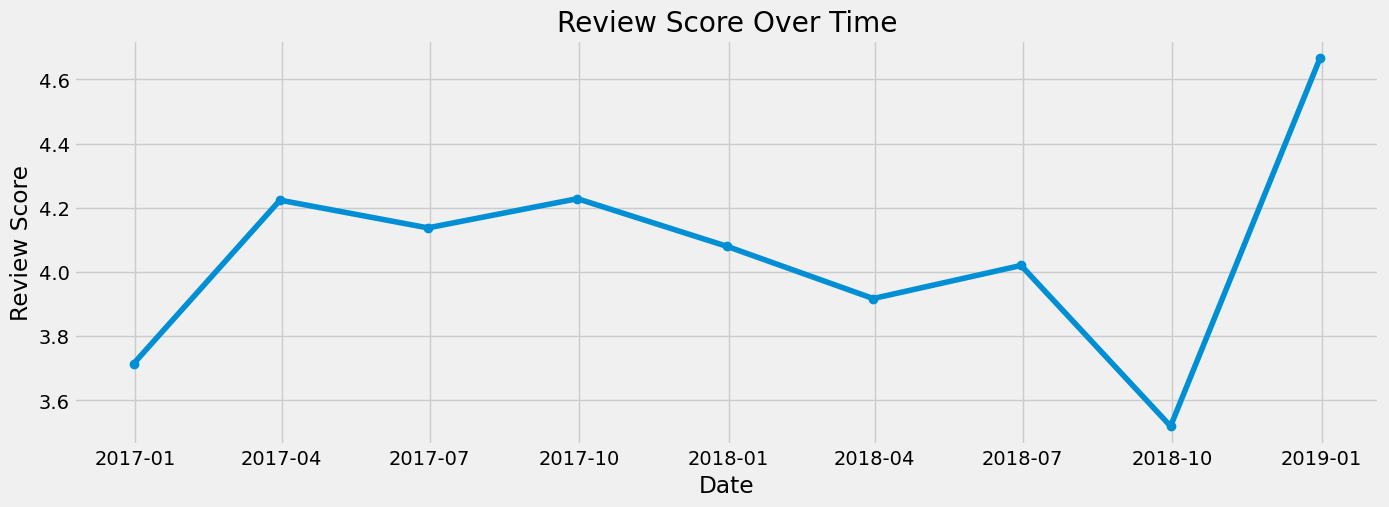

In [28]:

# Plotting the line chart
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(quarterly_avg_score.index, quarterly_avg_score['review_score'], marker='o', linestyle='-')
plt.title('Review Score Over Time')
plt.xlabel('Date')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

##### Export this subset in order to display a visualization later on on Tableau.

In [48]:
quarterly_avg_score.to_csv(os.path.join(path, '02 Data', 'Prepared Data','quarterly_avg_score.csv' ), index = False)

### 4. Decompose the data’s components.

In [29]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(quarterly_avg_score, model='additive')

In [30]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

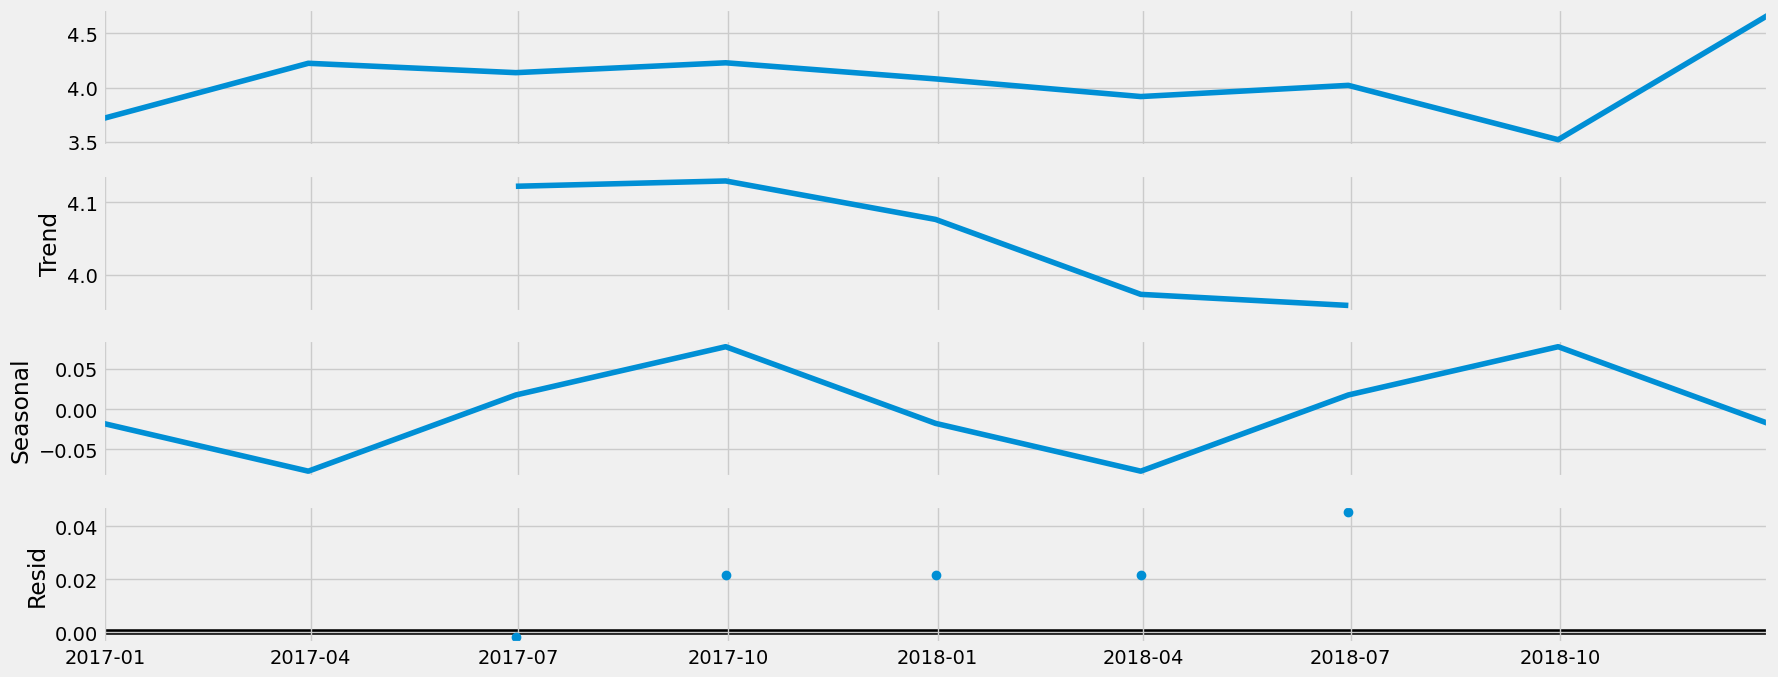

In [31]:
# Plot the separate components # Quartile analysis

decomposition.plot()
plt.show()

In [46]:
decomposition

##### The first chart in the figure above is the data itself (including all of its components). This is called the level.

##### The second is the  trend that gradually drops in a linear fashion after 10-2017.

##### The third component is the seasonality. I suppose these seasonal fluctuations  are represented by a spikey curve that changes at regular intervals. For example, we can observe peaks around April 2017, April 2018, and then a downward trend after October 2018. This pattern could be explained by the high sales volume during the pre- and during-Christmas holidays. With a greater number of orders, issues such as late delivery, wrong products, and others may arise, resulting in unsatisfied customers who may return products and leave bad review scores for the sellers. If we didn't have any seasonality (which is rarely the case), the curve would be flat.

#### And finally comes the noise—o“residual.”. Here I do not see any pattern nor have an idea what it could be.

In [164]:
# Decompose the time series using an additive model
# This time with the monthy aggregation

decomposition2 = sm.tsa.seasonal_decompose(df_monthly_avg_score2, model='additive')  

In [160]:
# Create a new dataframe with the same data and set the index to 'year_month'

df_monthly_avg_score2 = df_monthly_avg_score.copy()
df_monthly_avg_score2.index = pd.to_datetime(df_monthly_avg_score2.index)

##### I displayed the decomposition monthly, but as mentioned before,  I will continue with the quarterly time series analysis (quarterly_avg_score).

In [ ]:
# Plot the separate components     # Monthly analysis

decomposition2.plot()
plt.show()

### 5. Conduct a Dickey-Fuller test to check for stationarity.

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why I need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(quarterly_avg_score['review_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.588650
p-value                        0.489293
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


'The null hypothesis in this case would be the presence of a unit root (we want to disprove that there’s a unit root, which would mean that your data is stationary). Correspondingly, the alternative hypothesis is that there’s no unit root. If you can’t rule out the null hypothesis, your data is non-stationary.'

'Test statistic larger than critical value = can’t reject null hypothesis'

'Test statistic smaller than critical value = can reject null hypothesis'


#### Then is this instance, the Test Statistic value -1.588650 is larger than Critical Value (5%)  -3.477583, thus, I can't reject the null hypothesis yet.
#### p-value is also much greater than 0.05.,  A “significant” result would be a p-value of less than 0.05.

### 6. If the data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [35]:
# Create a new DataFrame to store the differenced data
data_diff = quarterly_avg_score.copy()

# Calculate the difference
data_diff['review_score_difference'] = data_diff['review_score'].diff()

# Drop any NaN values resulting from differencing
data_diff.dropna(inplace=True)


In [36]:
data_diff.head()

,review_score,review_score_difference
year_month,,
2017-03-31,4.223790,0.508945
2017-06-30,4.137455,-0.086334
2017-09-30,4.228352,0.090897
2017-12-31,4.079981,-0.148370
2018-03-31,3.917247,-0.162734


#### Run the Dickey-Fuller Test again

In [37]:
# Apply the test using the function on the time series
dickey_fuller(data_diff['review_score_difference'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.022225
p-value                        0.001299
Number of Lags Used            0.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


##### According to the results, we now have a stationary time-series dataset to analyze.

##### Test Statistic  -4.022225 is smaller than Critical Value (5%)  -3.477583
#####  And below we have p-value   0.001299, (“significant” result would be a p-value of less than 0.05)
#####  The test is significant, we can reject the null hypothesis.

'Test statistic larger than critical value = unable to reject null hypothesis.'

'Test statistic smaller than critical value = able to reject null hypothesis.'

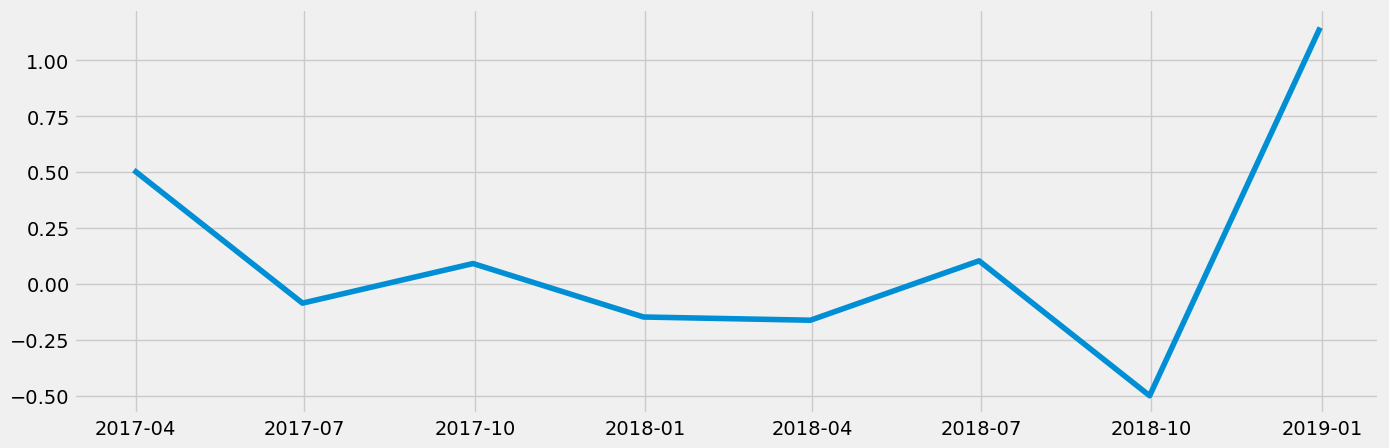

In [42]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff.index, data_diff['review_score_difference'])


### 7. Check the data’s autocorrelations.

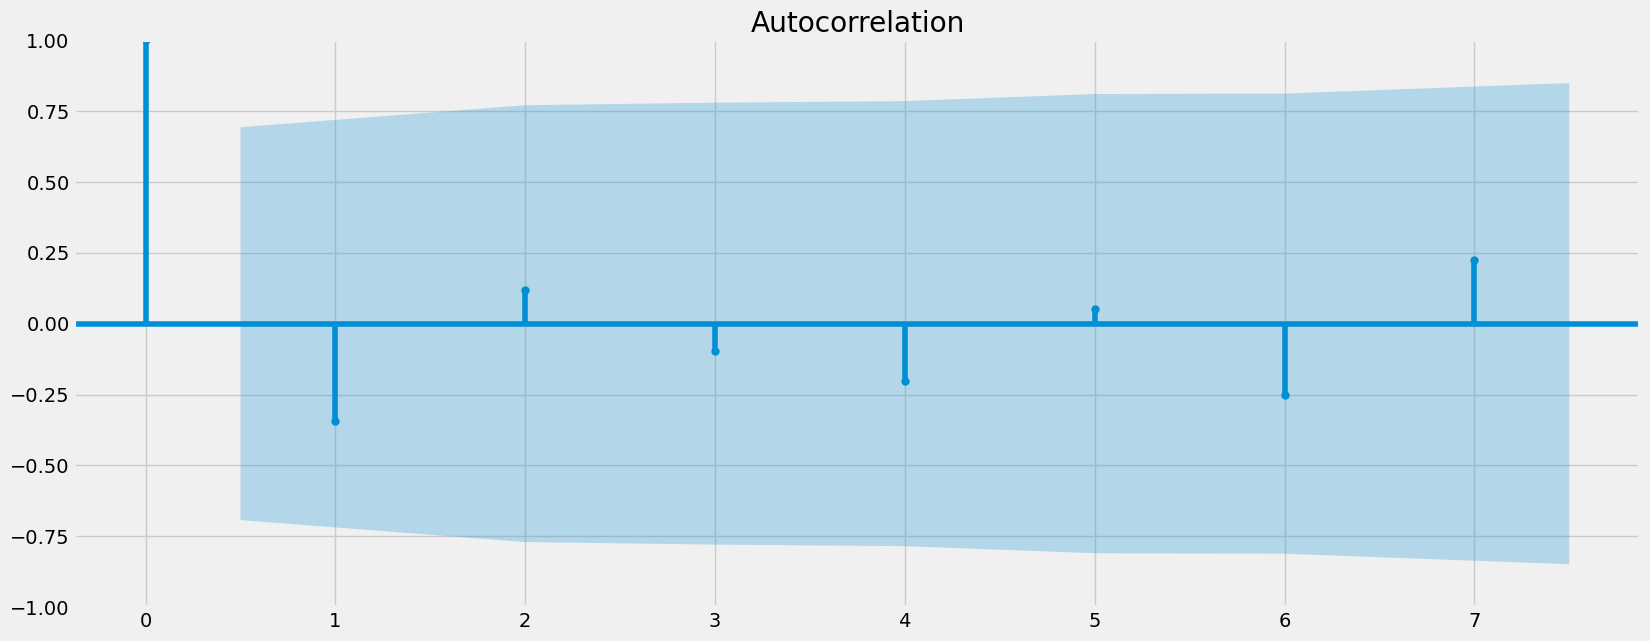

In [43]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here,I import the autocorrelation and partial correlation plots

plot_acf(data_diff['review_score_difference'])
plt.show()